In [203]:
import pandas as pd
import numpy as np
import pickle
from sklearn import metrics
import matplotlib.pyplot as plt
import math

In [204]:
dataset = 'WUSTL-IIoT'
dos_data = pd.read_pickle(f'data/{dataset}/dos_{dataset}.pkl')
recon_data = pd.read_pickle(f'data/{dataset}/recon_{dataset}.pkl')
comm_data = pd.read_pickle(f'data/{dataset}/comm_{dataset}.pkl')
output = 1

In [205]:
output_name = f'output_model_{output}'
output_path = f'output/{dataset}/{output_name}/'

dos_in = open(output_path+"dos_scores.pkl","rb")
dos_scores = pickle.load(dos_in)
recon_in = open(output_path+"recon_scores.pkl","rb")
recon_scores = pickle.load(recon_in)
comm_in = open(output_path+"comm_scores.pkl","rb")
comm_scores = pickle.load(comm_in)

In [207]:
dos_data_scored = dos_data[len(dos_data)-len(dos_scores):].copy()
dos_data_scored['ano_score'] = dos_scores

recon_data_scored = recon_data[len(recon_data)-len(recon_scores):].copy()
recon_data_scored['ano_score'] = recon_scores

comm_data_scored = comm_data[len(comm_data)-len(comm_scores):].copy()
comm_data_scored['ano_score'] = comm_scores

Best roc-thresh: 5.686764240264893, tpr: 0.997484196411468, fpr: 0.05991811191371792
Area under ROC curve: 0.970938026749676


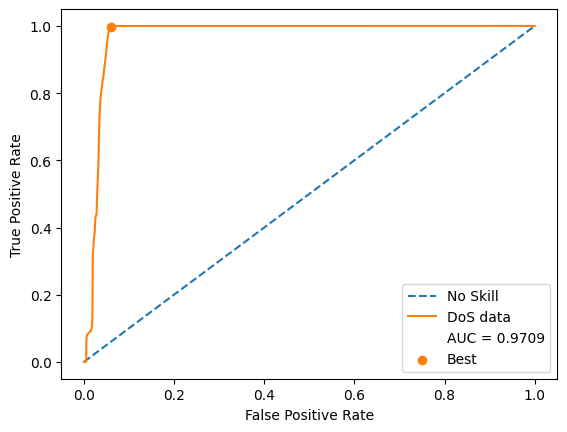

Best pr-thresh: 5.977438926696777, f1-score: 0.9248806214810062


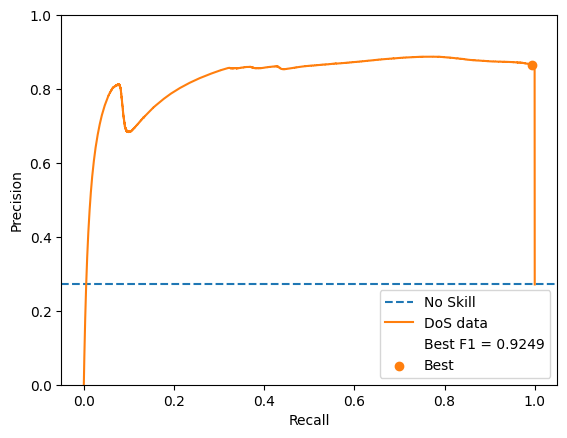

In [208]:
dos_y_true = dos_data_scored['Target']
dos_scores = dos_data_scored['ano_score']
fpr_dos, tpr_dos, dos_roc_thresholds = metrics.roc_curve(dos_y_true, dos_scores)
dos_roc_auc = metrics.auc(fpr_dos, tpr_dos)
dos_roc_gmeans = np.sqrt(tpr_dos * (1-fpr_dos))
dos_roc_ix = np.argmax(dos_roc_gmeans)
print(f'Best roc-thresh: {dos_roc_thresholds[dos_roc_ix]}, tpr: {tpr_dos[dos_roc_ix]}, fpr: {fpr_dos[dos_roc_ix]}')
print(f'Area under ROC curve: {dos_roc_auc}')

plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr_dos, tpr_dos, label='DoS data')
plt.plot([], [], ' ', label=f"AUC = {dos_roc_auc:.4f}")
plt.scatter(fpr_dos[dos_roc_ix], tpr_dos[dos_roc_ix], marker='o', color='C1', label='Best')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

dos_positive_ratio = dos_y_true.sum()/len(dos_y_true)
dos_precision, dos_recall, dos_pr_thresholds = metrics.precision_recall_curve(dos_y_true, dos_scores)
dos_pr_auc = metrics.auc(fpr_dos, tpr_dos)
eps = 1e-20
dos_pr_f1score = 2/((1/(dos_precision+eps))+(1/(dos_recall+eps)))
dos_pr_ix = np.argmax(dos_pr_f1score)
print(f'Best pr-thresh: {dos_pr_thresholds[dos_pr_ix]}, f1-score: {dos_pr_f1score[dos_pr_ix]}')

plt.axhline(y = dos_positive_ratio, linestyle='--', label='No Skill')
plt.plot(dos_recall[1:-1], dos_precision[1:-1], label='DoS data', color='C1')
plt.plot([], [], ' ', label=f"Best F1 = {dos_pr_f1score[dos_pr_ix]:.4f}")
plt.scatter(dos_recall[dos_pr_ix], dos_precision[dos_pr_ix], marker='o', color='C1', label='Best')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim((0,1))
plt.legend()
plt.show()

Best roc-thresh: 3.330275058746338, tpr: 0.9984223300970874, fpr: 0.028320104410824633
Area under ROC curve: 0.9926237959273417


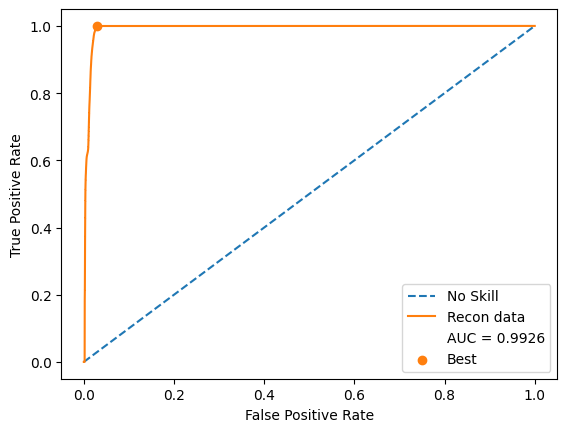

Best pr-thresh: 10.756420135498047, f1-score: 0.7187679907887162


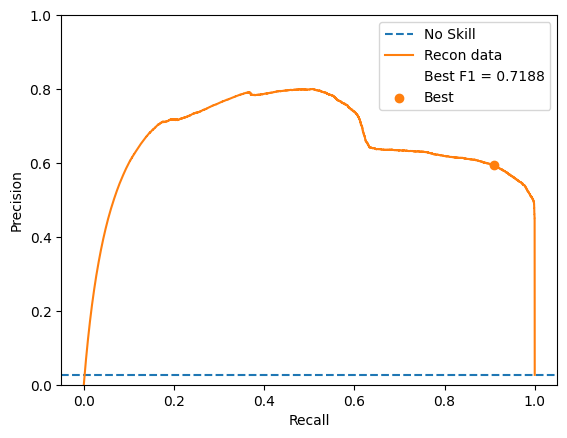

In [209]:
recon_y_true = recon_data_scored['Target']
recon_scores = recon_data_scored['ano_score']
fpr_recon, tpr_recon, recon_roc_thresholds = metrics.roc_curve(recon_y_true, recon_scores)
recon_roc_auc = metrics.auc(fpr_recon, tpr_recon)
recon_roc_gmeans = np.sqrt(tpr_recon * (1-fpr_recon))
recon_roc_ix = np.argmax(recon_roc_gmeans)
print(f'Best roc-thresh: {recon_roc_thresholds[recon_roc_ix]}, tpr: {tpr_recon[recon_roc_ix]}, fpr: {fpr_recon[recon_roc_ix]}')
print(f'Area under ROC curve: {recon_roc_auc}')

plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr_recon, tpr_recon, label='Recon data')
plt.plot([], [], ' ', label=f"AUC = {recon_roc_auc:.4f}")
plt.scatter(fpr_recon[recon_roc_ix], tpr_recon[recon_roc_ix], marker='o', color='C1', label='Best')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

recon_positive_ratio = recon_y_true.sum()/len(recon_y_true)
recon_precision, recon_recall, recon_pr_thresholds = metrics.precision_recall_curve(recon_y_true, recon_scores)
recon_pr_auc = metrics.auc(fpr_recon, tpr_recon)
eps = 1e-20
recon_pr_f1score = 2/((1/(recon_precision+eps))+(1/(recon_recall+eps)))
recon_pr_ix = np.argmax(recon_pr_f1score)
print(f'Best pr-thresh: {recon_pr_thresholds[recon_pr_ix]}, f1-score: {recon_pr_f1score[recon_pr_ix]}')

plt.axhline(y = recon_positive_ratio, linestyle='--', label='No Skill')
plt.plot(recon_recall[1:-1], recon_precision[1:-1], label='Recon data', color='C1')
plt.plot([], [], ' ', label=f"Best F1 = {recon_pr_f1score[recon_pr_ix]:.4f}")
plt.scatter(recon_recall[recon_pr_ix], recon_precision[recon_pr_ix], marker='o', color='C1', label='Best')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim((0,1))
plt.legend()
plt.show()

Best roc-thresh: 2.6414637565612793, tpr: 0.9808917197452229, fpr: 0.05023128192914957
Area under ROC curve: 0.9957454756379965


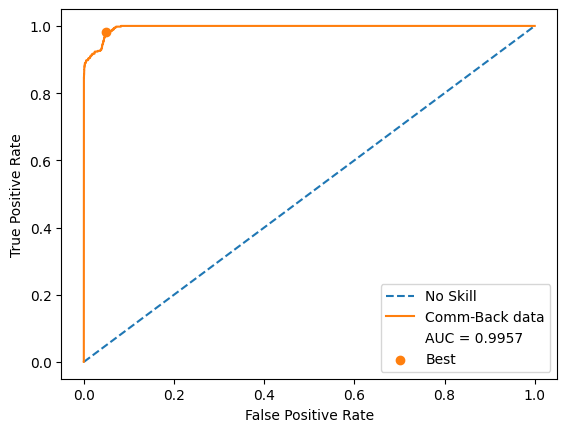

Best pr-thresh: 2369.41015625, f1-score: 0.8901472253680635


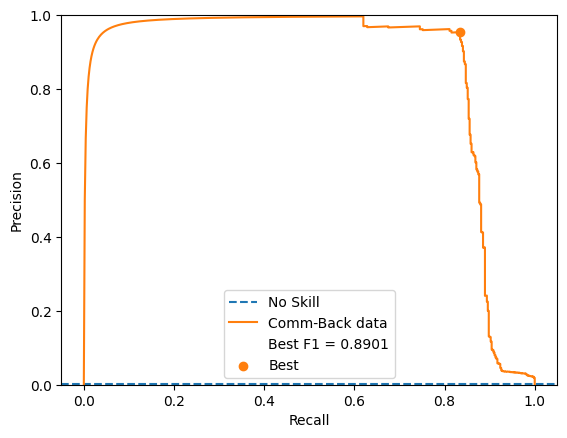

In [210]:
comm_y_true = comm_data_scored['Target']
comm_scores = comm_data_scored['ano_score']
fpr_comm, tpr_comm, comm_roc_thresholds = metrics.roc_curve(comm_y_true, comm_scores)
comm_roc_auc = metrics.auc(fpr_comm, tpr_comm)
comm_roc_gmeans = np.sqrt(tpr_comm * (1-fpr_comm))
comm_roc_ix = np.argmax(comm_roc_gmeans)
print(f'Best roc-thresh: {comm_roc_thresholds[comm_roc_ix]}, tpr: {tpr_comm[comm_roc_ix]}, fpr: {fpr_comm[comm_roc_ix]}')
print(f'Area under ROC curve: {comm_roc_auc}')

plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr_comm, tpr_comm, label='Comm-Back data')
plt.plot([], [], ' ', label=f"AUC = {comm_roc_auc:.4f}")
plt.scatter(fpr_comm[comm_roc_ix], tpr_comm[comm_roc_ix], marker='o', color='C1', label='Best')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

comm_positive_ratio = comm_y_true.sum()/len(comm_y_true)
comm_precision, comm_recall, comm_pr_thresholds = metrics.precision_recall_curve(comm_y_true, comm_scores)
comm_pr_auc = metrics.auc(fpr_comm, tpr_comm)
eps = 1e-20
comm_pr_f1score = 2/((1/(comm_precision+eps))+(1/(comm_recall+eps)))
comm_pr_ix = np.argmax(comm_pr_f1score)
print(f'Best pr-thresh: {comm_pr_thresholds[comm_pr_ix]}, f1-score: {comm_pr_f1score[comm_pr_ix]}')

plt.axhline(y = comm_positive_ratio, linestyle='--', label='No Skill')
plt.plot(comm_recall[1:-1], comm_precision[1:-1], label='Comm-Back data', color='C1')
plt.plot([], [], ' ', label=f"Best F1 = {comm_pr_f1score[comm_pr_ix]:.4f}")
plt.scatter(comm_recall[comm_pr_ix], comm_precision[comm_pr_ix], marker='o', color='C1', label='Best')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim((0,1))
plt.legend()
plt.show()

In [211]:
print(f'Summary of results for model_{output}')
print(f'ROC AUC (dos/recon/comm): {metrics.auc(fpr_dos, tpr_dos):.6f}, {metrics.auc(fpr_recon, tpr_recon):.6f}, {metrics.auc(fpr_comm, tpr_comm):.6f}')
print(f'Best F1-score (dos/recon/comm): {dos_pr_f1score[dos_pr_ix]:.6f}, {recon_pr_f1score[recon_pr_ix]:.6f}, {comm_pr_f1score[comm_pr_ix]:.6f}')

Summary of results for model_11
ROC AUC (dos/recon/comm): 0.970938, 0.992624, 0.995745
Best F1-score (dos/recon/comm): 0.924881, 0.718768, 0.890147
